# Assignment 3

In [243]:
# Initialize and import
import otter
grader = otter.Notebook()
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

### Extracting Primary data and dropping Timestamp

In [244]:
# Import data and clean 
df = pd.read_csv('primary_Data.csv')

# Drop the 'timestamps' column
df = df.drop(columns=['Timestamp'])

# View the first few rows of the DataFrame
print(df.head())

# Get summary information
print(df.info())


  Roll Number (For lucky draw) What is your age? What is your gender?  \
0                          NaN             20-25               Female   
1                          NaN               <20               Female   
2                     25020448             20-25                 Male   
3                     25020345             20-25                 Male   
4                     25020043             20-25               Female   

  In comparison to previous years, have you found yourself using e-commerce sites and apps more frequently?  \
0                                                Yes                                                          
1                                                Yes                                                          
2                                                Yes                                                          
3                                                 No                                                          
4     

### DATA CLEANING (renaming columns)

In [245]:
# Combined renaming of columns in one step
df = df.rename(columns={
    'Roll Number (For lucky draw)': 'Roll_Number',
    'What is your age?': 'Age',
    'What is your gender?': 'Gender',
    'In comparison to previous years, have you found yourself using e-commerce sites and apps more frequently?': 'Increase_Use',
    'If yes, what factor has had the most significant influence on this increase?': 'Increase_Factor',
    'What factors, if any, are stopping you from shifting completely from traditional retail to e-commerce shopping?': 'Stopping_Factor',
    'On a scale of 1 to 5, how inclined are you to make a purchase online when you come across a product advertised on social media?': 'Advertisement_Effect',
    'Have you recently made a purchase as a result of seeing a targeted advertisement on social media that aligned with what you were specifically looking for or interested in?': 'Targeted_Advertisement_Purchase',
    'When it comes to buying online products, which social media platform\'s advertisements have the most influence on your purchasing decision?': 'Social_Media_Platform',
    'When shopping online, which type of content do you find most engaging and influential in your purchasing decisions?': 'Engaging_Medium',
    'Do you think the type of content shared by e-commerce brands on social media affects your decision to make a purchase from them?': 'Purchase_Decision_Influence',
    'When shopping online, how often do you consider customer reviews and ratings before making a purchase?': 'Review_Consideration',
    'Which of the following best describes your preferred payment method when shopping online?': 'Payment_Method',
    'How likely are you to trust a small online business that offers secure payment options and encryption for your personal information?': 'Trust_Level',
    'How often do you share your positive or negative shopping experiences with e-commerce businesses on social media or review platforms?': 'Sharing_Review'
})

# Display the updated column names to confirm the changes
print(df.columns)

# Display the first few rows to confirm the changes
df.head()


Index(['Roll_Number', 'Age', 'Gender', 'Increase_Use', 'Influencing_Factor',
       'Stopping_Factor', 'Advertisement_Effect',
       'Targeted_Advertisement_Purchase', 'Social_Media_Platform',
       'Engaging_Medium', 'Purchase_Decision_Influence',
       'Review_Consideration', 'Payment_Method', 'Trust_Level',
       'Sharing_Review'],
      dtype='object')


,Roll_Number,Age,Gender,Increase_Use,Influencing_Factor,Stopping_Factor,Advertisement_Effect,Targeted_Advertisement_Purchase,Social_Media_Platform,Engaging_Medium,Purchase_Decision_Influence,Review_Consideration,Payment_Method,Trust_Level,Sharing_Review
0,NaN,20-25,Female,Yes,Convenience of e-commerce,Preference for physically examining products b...,3,Yes,Instagram,Videos,Somewhat affects my decision,Always,Credit Card,Very likely,Occasionally
1,NaN,<20,Female,Yes,Convenience of e-commerce,Concerns about the quality of online products,1,No,Instagram,Images,Somewhat affects my decision,Often,Credit Card,Somewhat likely,Rarely
2,25020448,20-25,Male,Yes,Convenience of e-commerce,Preference for physically examining products b...,3,Yes,Instagram,Images,Strongly affects my decision,Always,Debit Card,Very likely,Frequently
3,25020345,20-25,Male,No,Time Efficiency,Preference for physically examining products b...,1,No,Instagram,Videos,Strongly affects my decision,Often,Credit Card,Somewhat likely,Never
4,25020043,20-25,Female,Yes,Cost Savings/Online Discounts,Concerns about the quality of online products,4,Yes,Instagram,Videos,Strongly affects my decision,Always,Cash on delivery,Very likely,Frequently


### Pre-processing Data 

In [246]:
df['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
df['Targeted_Advertisement_Purchase'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['Increase_Use'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['Sharing_Review'].replace({'Frequently': 3, 'Occasionally': 2, 'Rarely': 1, 'Never': 0}, inplace=True)
df['Trust_Level'].replace({'Extremely likely': 4, 'Very likely': 3, 'Somewhat likely': 2, 'Not very likely': 1, 'Not likely at all': 0}, inplace=True)
df['Review_Consideration'].replace({'Always': 4, 'Often': 3, 'Sometimes': 2, 'Rarely': 1, 'Never': 0}, inplace=True)
df['Age'].replace({'<20': 18, '20-25': 23, '26-30': 28, '31-35': 33, '35+': 38}, inplace=True)
df['Purchase_Decision_Influence'].replace({'Strongly affects my decision':2,'Somewhat affects my decision':1,
                                           'Has no effect on my decision':0, "I don't follow e-commerce brands on social media":
                                           'dont follow'
                                          }, inplace=True)


df

,Roll_Number,Age,Gender,Increase_Use,Influencing_Factor,Stopping_Factor,Advertisement_Effect,Targeted_Advertisement_Purchase,Social_Media_Platform,Engaging_Medium,Purchase_Decision_Influence,Review_Consideration,Payment_Method,Trust_Level,Sharing_Review
0,NaN,23,1,1,Convenience of e-commerce,Preference for physically examining products b...,3,1,Instagram,Videos,1,4,Credit Card,3,2
1,NaN,18,1,1,Convenience of e-commerce,Concerns about the quality of online products,1,0,Instagram,Images,1,3,Credit Card,2,1
2,25020448,23,0,1,Convenience of e-commerce,Preference for physically examining products b...,3,1,Instagram,Images,2,4,Debit Card,3,3
3,25020345,23,0,0,Time Efficiency,Preference for physically examining products b...,1,0,Instagram,Videos,2,3,Credit Card,2,0
4,25020043,23,1,1,Cost Savings/Online Discounts,Concerns about the quality of online products,4,1,Instagram,Videos,2,4,Cash on delivery,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,45,23,1,1,Wide Product Variety,NaN,2,1,Instagram,Written product descriptions,1,4,Bank Transfer,3,0
194,41,23,1,1,Improved websites and app interfaces,E-commerce applications are difficult to use,3,1,Instagram,Images,1,2,Debit Card,3,2
195,NaN,23,1,1,Time Efficiency,Concerns about the quality of online products,3,1,Instagram,Videos,1,2,Cash on delivery,2,1
196,02,23,1,0,Cost Savings/Online Discounts,High shipping costs,4,1,Youtube,Videos,1,2,Cash on delivery,2,2


In [247]:
#checking unique values for column influencing factor
unique_values = df['Influencing_Factor'].unique()
print(unique_values)
#cleaning and merging similar responses
df['Influencing_Factor'].replace({'Convenience of e-commerce': 'Convenience', 'Cost Savings/Online Discounts':
                                 'Online Discounts','Getting relevant ads':'Relevant ads',
                                 'Improved websites and app interfaces':'Improved websites',
                                  'Time saving and doorstep delivery of products .' :'Convenience',
                                     "I haven't found my myself to using e-commerce":'Not any'}, inplace=True)
df['Influencing_Factor'].fillna('Not any', inplace=True)

df


['Convenience of e-commerce' 'Time Efficiency'
 'Cost Savings/Online Discounts' 'Wide Product Variety'
 'Getting relevant ads' nan 'Improved websites and app interfaces'
 'retail therapy ' 'Time saving and doorstep delivery of products .'
 "I haven't found my myself to using e-commerce"]


,Roll_Number,Age,Gender,Increase_Use,Influencing_Factor,Stopping_Factor,Advertisement_Effect,Targeted_Advertisement_Purchase,Social_Media_Platform,Engaging_Medium,Purchase_Decision_Influence,Review_Consideration,Payment_Method,Trust_Level,Sharing_Review
0,NaN,23,1,1,Convenience,Preference for physically examining products b...,3,1,Instagram,Videos,1,4,Credit Card,3,2
1,NaN,18,1,1,Convenience,Concerns about the quality of online products,1,0,Instagram,Images,1,3,Credit Card,2,1
2,25020448,23,0,1,Convenience,Preference for physically examining products b...,3,1,Instagram,Images,2,4,Debit Card,3,3
3,25020345,23,0,0,Time Efficiency,Preference for physically examining products b...,1,0,Instagram,Videos,2,3,Credit Card,2,0
4,25020043,23,1,1,Online Discounts,Concerns about the quality of online products,4,1,Instagram,Videos,2,4,Cash on delivery,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,45,23,1,1,Wide Product Variety,NaN,2,1,Instagram,Written product descriptions,1,4,Bank Transfer,3,0
194,41,23,1,1,Improved websites,E-commerce applications are difficult to use,3,1,Instagram,Images,1,2,Debit Card,3,2
195,NaN,23,1,1,Time Efficiency,Concerns about the quality of online products,3,1,Instagram,Videos,1,2,Cash on delivery,2,1
196,02,23,1,0,Online Discounts,High shipping costs,4,1,Youtube,Videos,1,2,Cash on delivery,2,2


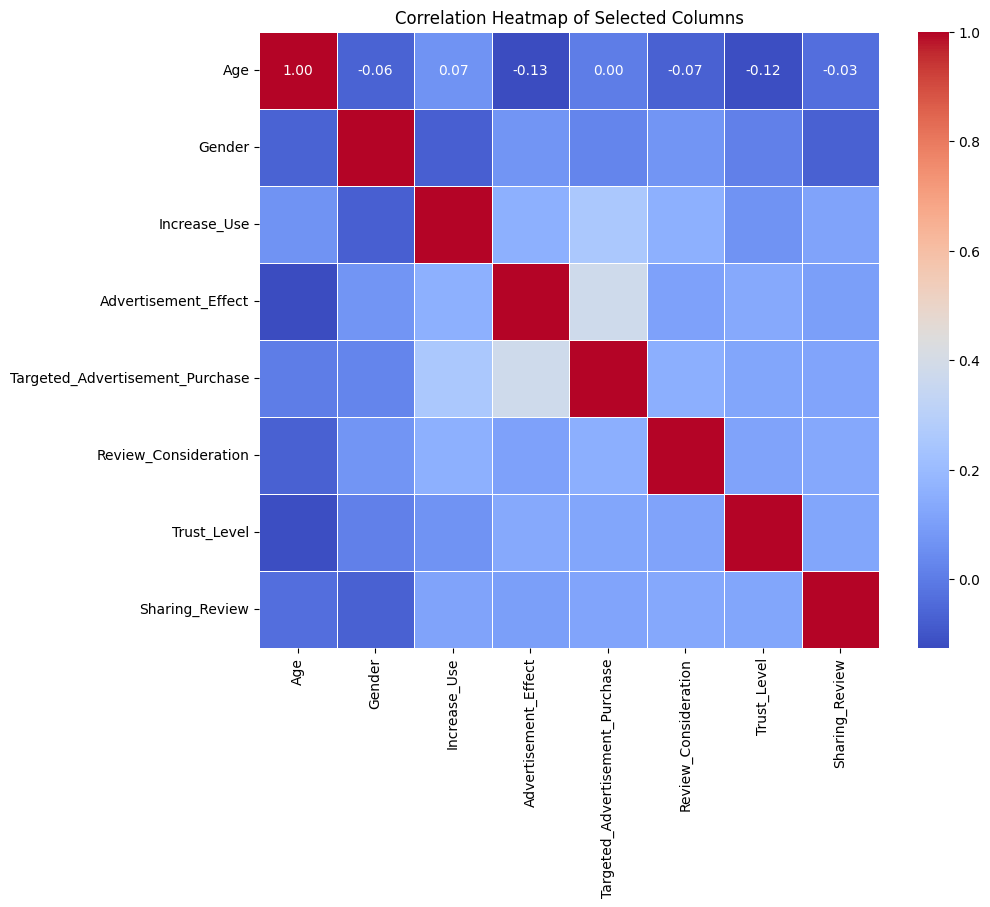

In [248]:
selected_columns = ['Age', 'Gender', 'Increase_Use', 'Advertisement_Effect', 'Targeted_Advertisement_Purchase'
                    , 'Review_Consideration', 'Trust_Level', 'Sharing_Review']

# Create a subset DataFrame with selected columns
subset_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Selected Columns")
plt.show()

**Research Question 1: What factors drive the transition from traditional retail to e-commerce?**

/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed

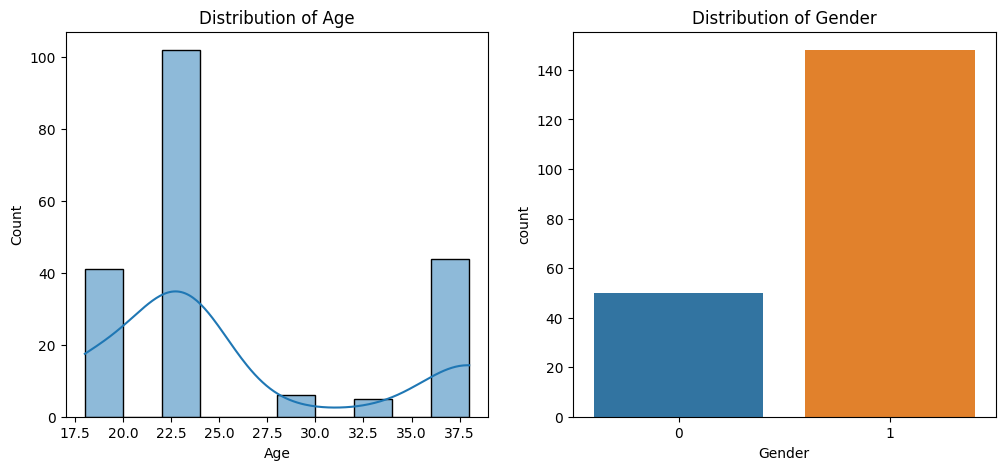

In [249]:
# Distribution of Age and Gender
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


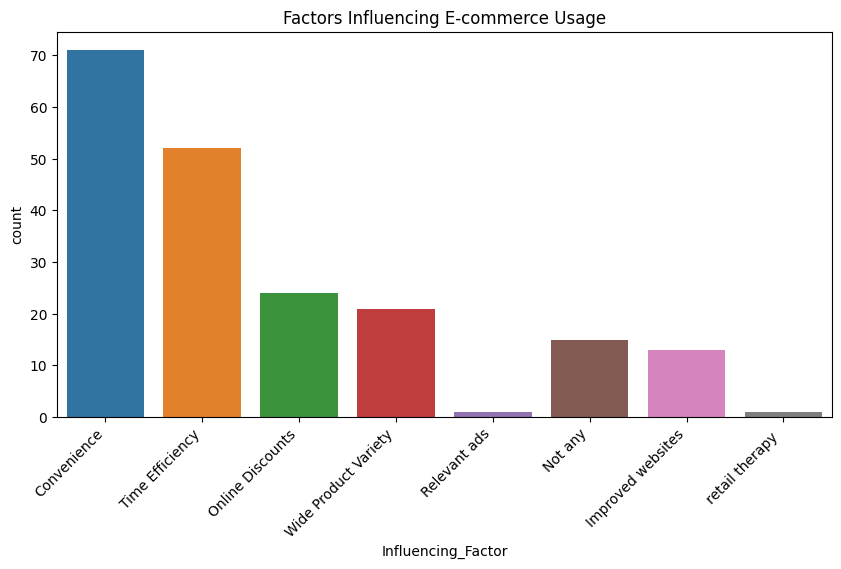

In [250]:
# Factors Influencing E-commerce Usage
plt.figure(figsize=(10, 5))
sns.countplot(x='Influencing_Factor', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Factors Influencing E-commerce Usage')
plt.show()

/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


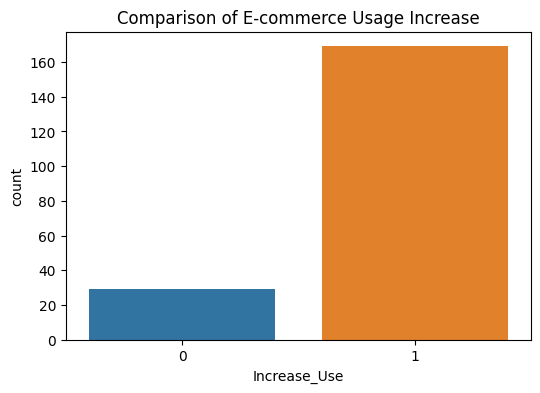

In [251]:
# Comparison of E-commerce Usage Increase
plt.figure(figsize=(6, 4))
sns.countplot(x='Increase_Use', data=df)
plt.title('Comparison of E-commerce Usage Increase')
plt.show()

**Research Question 2: Do age and gender affect e-commerce usage frequency, and are there variations in e-commerce adoption across different demographics?**

/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

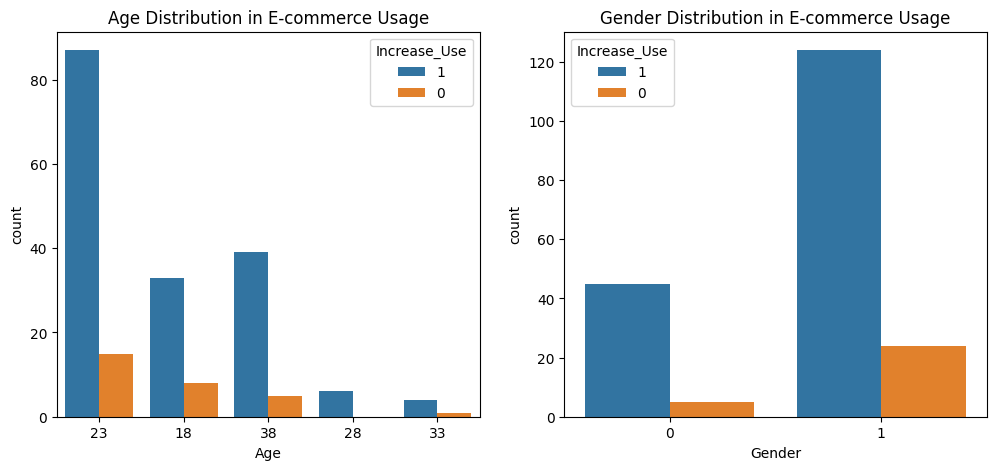

In [252]:
df['Age'] = df['Age'].astype(str)
df['Increase_Use'] = df['Increase_Use'].astype(str)  # Do this if 'Increase_Use' is also numeric

# Then, create your plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Age', hue='Increase_Use', data=df)
plt.title('Age Distribution in E-commerce Usage')

plt.subplot(1, 2, 2)
sns.countplot(x='Gender', hue='Increase_Use', data=df)
plt.title('Gender Distribution in E-commerce Usage')

plt.show()


/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

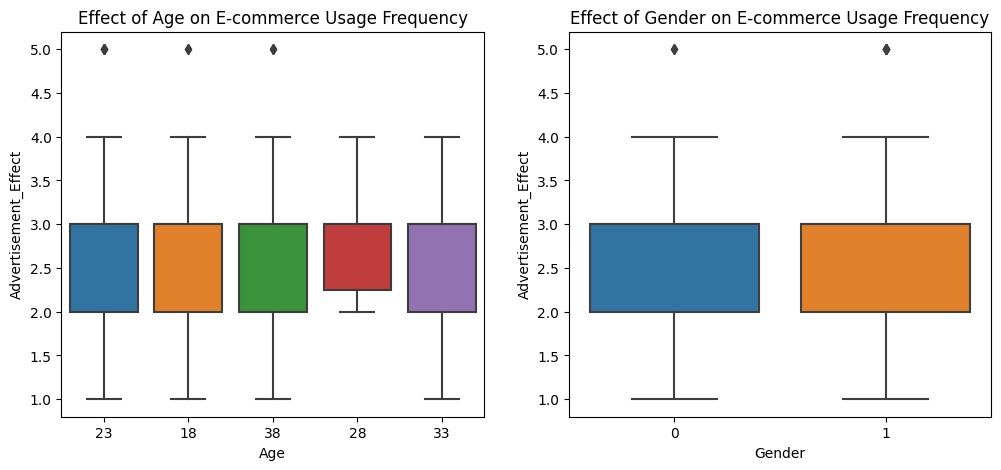

In [253]:
# E-commerce Usage Frequency Across Demographics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Age', y='Advertisement_Effect', data=df)
plt.title('Effect of Age on E-commerce Usage Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Advertisement_Effect', data=df)
plt.title('Effect of Gender on E-commerce Usage Frequency')
plt.show()

**Research Question 3: How does social media advertising affect e-commerce sales and consumer purchasing decisions?**

/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


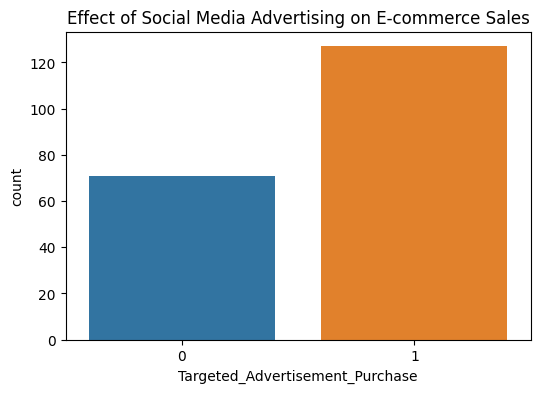

In [254]:
# Effect of Social Media Advertising
plt.figure(figsize=(6, 4))
sns.countplot(x='Targeted_Advertisement_Purchase', data=df)
plt.title('Effect of Social Media Advertising on E-commerce Sales')
plt.show()

/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

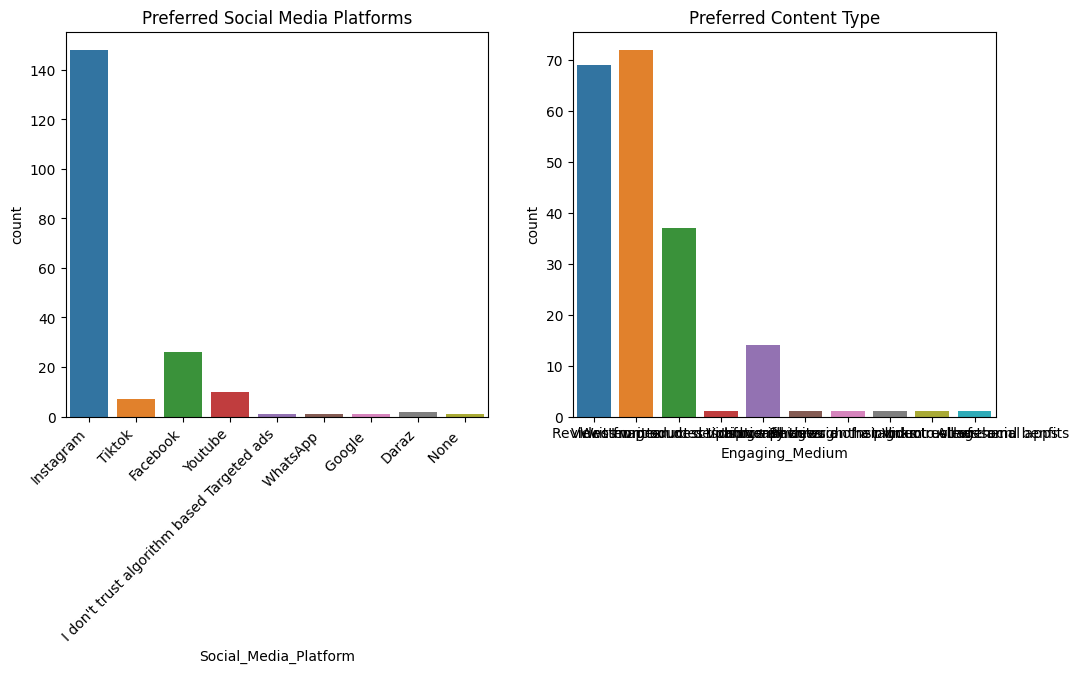

In [255]:
# Preferred Social Media Platforms and Content
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Social_Media_Platform', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Preferred Social Media Platforms')

plt.subplot(1, 2, 2)
sns.countplot(x='Engaging_Medium', data=df)
plt.title('Preferred Content Type')
plt.show()

/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

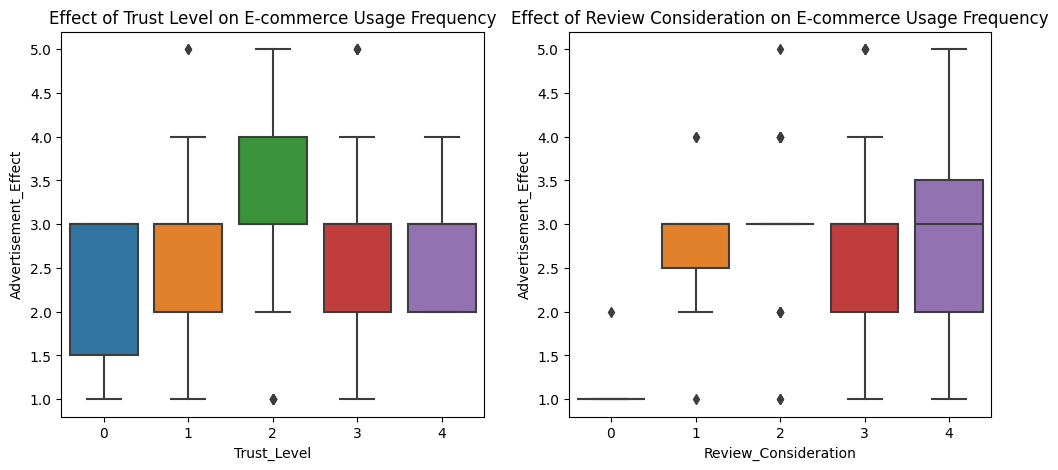

In [256]:
# Trust Level and Review Consideration
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Trust_Level', y='Advertisement_Effect', data=df)
plt.title('Effect of Trust Level on E-commerce Usage Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x='Review_Consideration', y='Advertisement_Effect', data=df)
plt.title('Effect of Review Consideration on E-commerce Usage Frequency')
plt.show()

**Importing Secondary Data**

In [257]:
df_secondary = pd.read_csv('Amazon_Data.csv')


# Drop the 'timestamps' column
df_secondary = df_secondary.drop(columns=['Timestamp'])
# Display the first few rows of the secondary DataFrame
df_secondary.head()



,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


**Premliminary Data Exploration**


In [258]:
print("Dataset Shape:", df_secondary.shape)
print("\nColumn Names:", df_secondary.columns.tolist())
# Checking for missing values
print("\nMissing Values:\n", df_secondary.isnull().sum())
print("\nData Types:\n", df_secondary.dtypes)




Dataset Shape: (602, 22)

Column Names: ['age', 'Gender', 'Purchase_Frequency', 'Purchase_Categories', 'Personalized_Recommendation_Frequency', 'Browsing_Frequency', 'Product_Search_Method', 'Search_Result_Exploration', 'Customer_Reviews_Importance', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness', 'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness', 'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas']

Missing Values:
 age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_

**Descriptive Statistics**

In [259]:
print("\nDescriptive Statistics:\n", df_secondary.describe())



Descriptive Statistics:
               age  Customer_Reviews_Importance  \
count  602.000000                   602.000000   
mean    30.790698                     2.480066   
std     10.193276                     1.185226   
min      3.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     36.000000                     3.000000   
max     67.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              602.000000        602.000000   
mean                                 2.699336          2.672757   
std                                  1.042028          0.899744   
min                                  1.000000          1.000000   
25%                                  2.000000          2.000000   
50%                                  3.000000          3.000000   
75%                                  3.000000         

*DATA CLEANING* 

In [260]:
df_secondary['age'] = df_secondary['age'].astype(int)
df_secondary.dropna()



,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,Maybe,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,Maybe,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,Maybe,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [261]:
# Assuming 'df' has the column 'Purchase_Categories' with categories separated by ';',
# we will extract the unique categories across all entries in this column.

# Extract the 'Purchase_Categories' column
purchase_categories = df_secondary['Purchase_Categories']

# Split the entries by ';' and then flatten the list
split_categories = purchase_categories.str.split(';').explode()

# Find the unique categories
unique_categories = split_categories.unique()

unique_categories.tolist()  # Convert to list for better readability if needed



['Beauty and Personal Care',
 'Clothing and Fashion',
 'Groceries and Gourmet Food',
 'others',
 'Home and Kitchen']

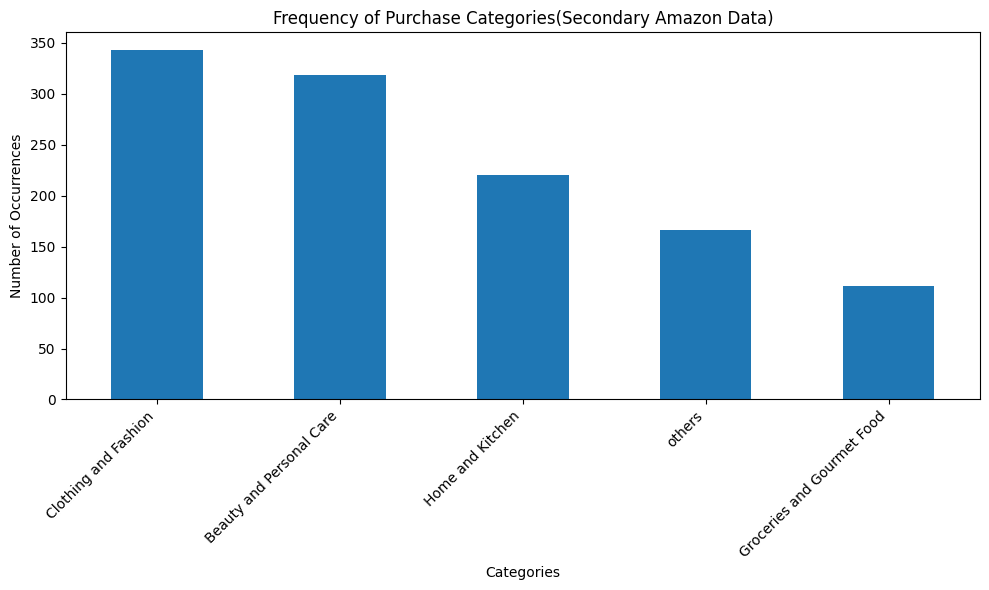

In [262]:
# Assuming 'df' has the column 'Purchase_Categories', and it contains categories separated by ';'
# We will create a plot with unique categories on the x-axis and the number of occurrences on the y-axis.

# We'll use the previous approach to split and explode the 'Purchase_Categories', then count the occurrences.
purchase_categories = df_secondary['Purchase_Categories'].str.split(';').explode()
category_counts = purchase_categories.value_counts()

# Now, let's create the plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Purchase Categories(Secondary Amazon Data)')
plt.xlabel('Categories')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Show the plot
plt.show()


***Univariate Analysis***

<Axes: xlabel='Gender'>

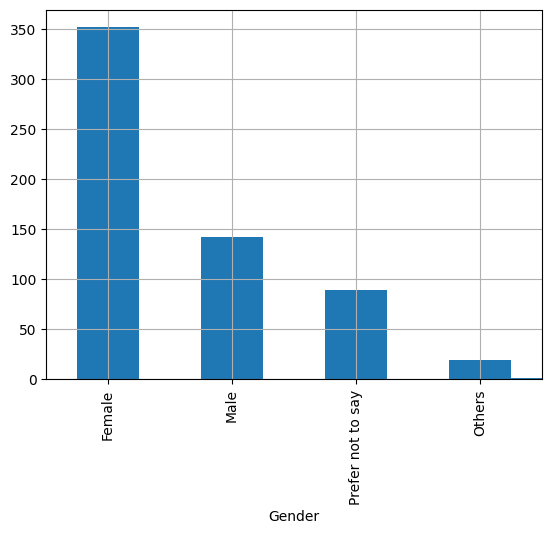

In [263]:
#  for 'Gender'
df_secondary['Gender'].value_counts().plot(kind='bar')
#  for 'age'
df_secondary['age'].hist()


*Bivariate Analysis*

<Axes: title={'center': 'age'}, xlabel='Gender'>

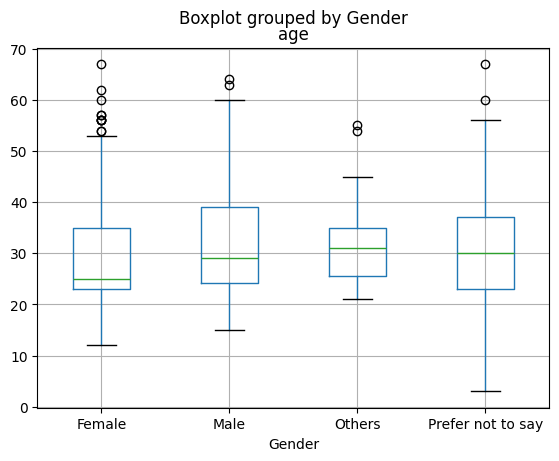

In [264]:
# Example: Gender vs. Age
df_secondary.boxplot(column='age', by='Gender')


**Heatmap to explore correlation**

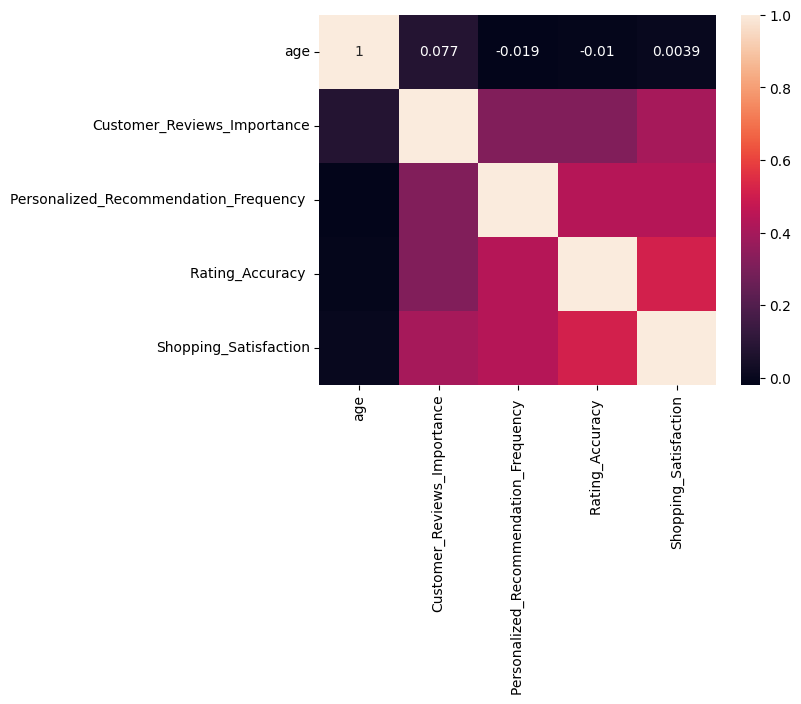

In [265]:
# Exclude non-numeric columns and calculate correlation
numeric_df = df_secondary.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()


/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hammadjavaid/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

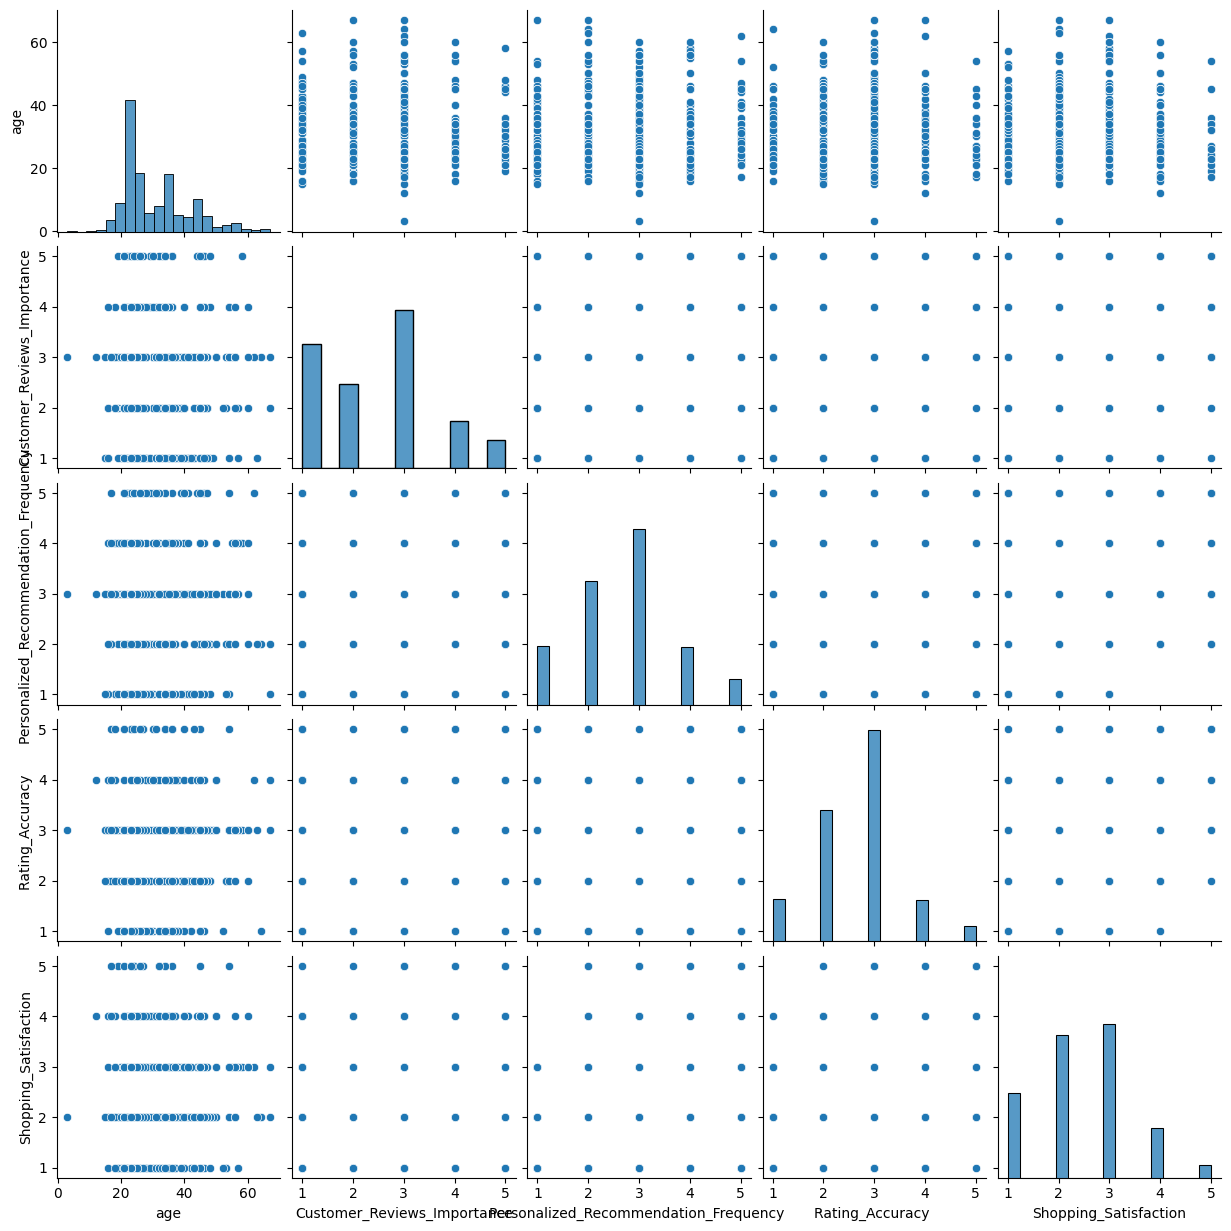

In [266]:
sns.pairplot(df_secondary)


*Gender Based Analysis

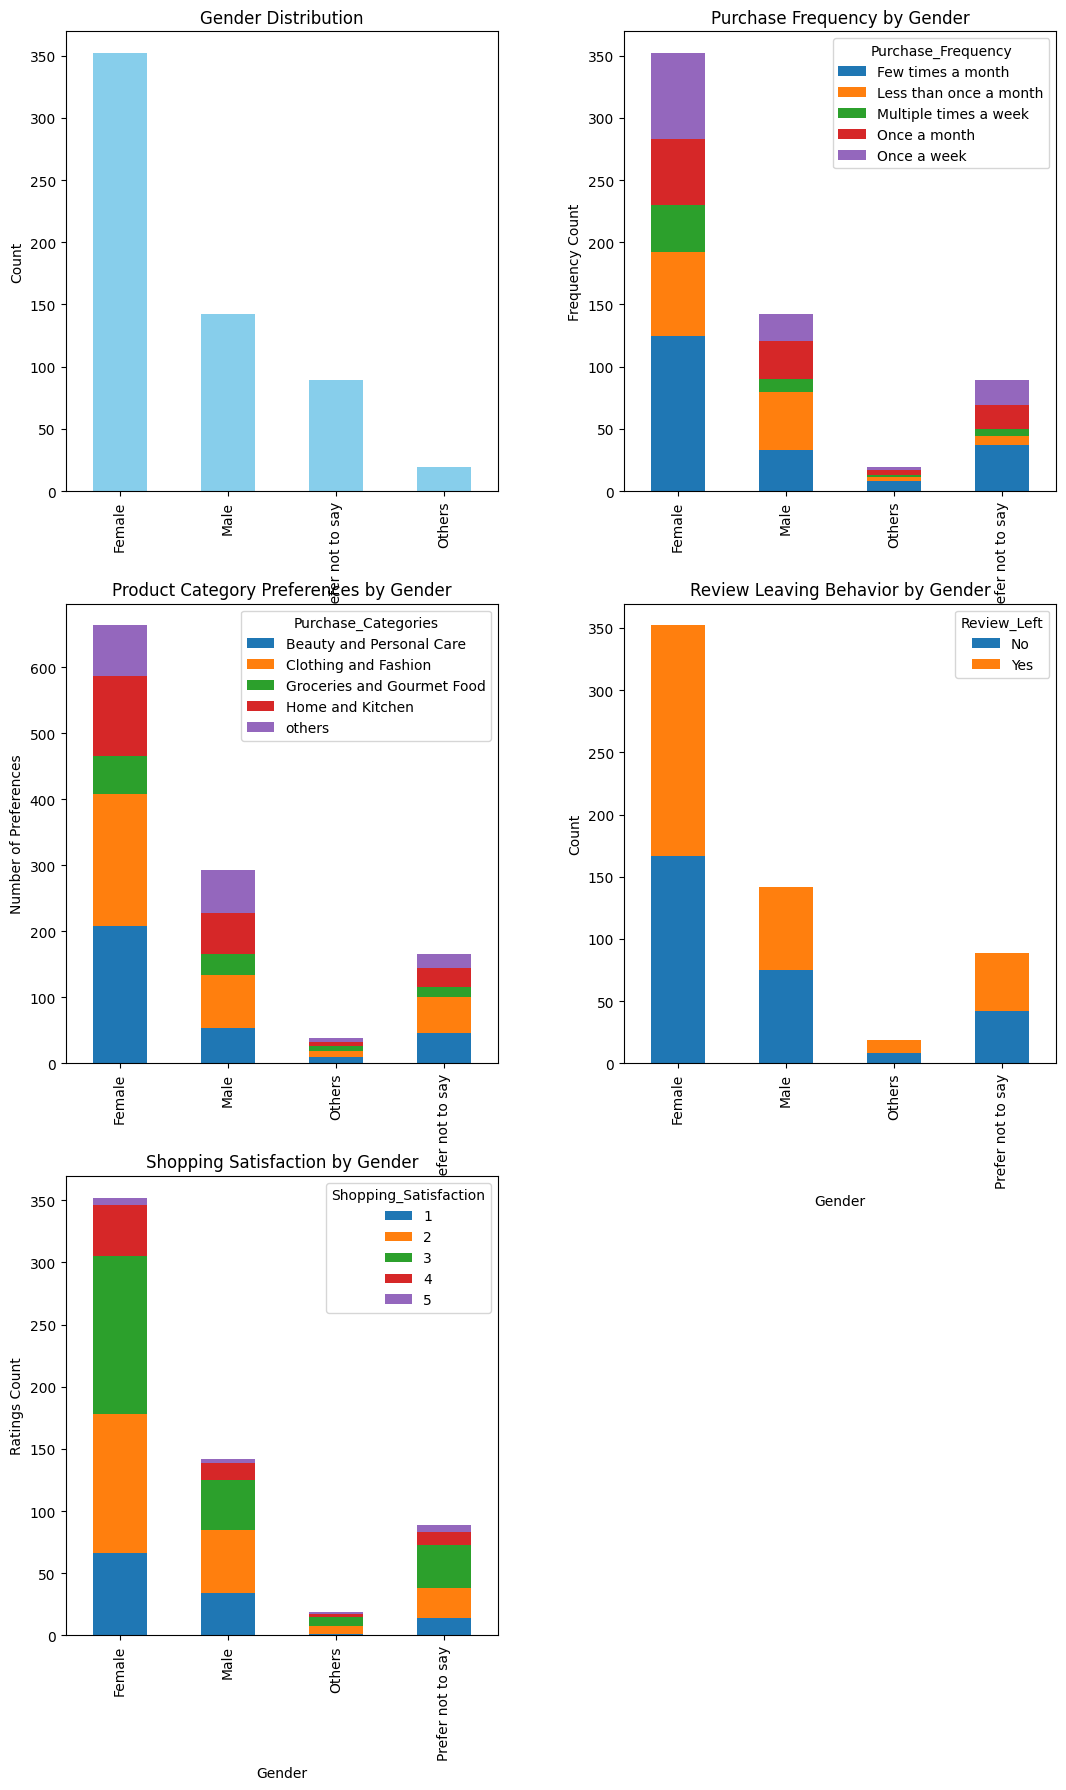

In [267]:

# Creating a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

# Adjusting layout
plt.tight_layout(pad=6.0)

# Gender Distribution Plot
df_secondary['Gender'].value_counts().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Gender Distribution')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Count')

# Purchase Frequency by Gender
df_secondary.groupby('Gender')['Purchase_Frequency'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axes[0,1])
axes[0,1].set_title('Purchase Frequency by Gender')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Frequency Count')

# Product Category Preferences by Gender
split_categories_gender = df_secondary.set_index('Gender')['Purchase_Categories'].str.split(';').explode()
category_gender_count = split_categories_gender.groupby(level=0).value_counts().unstack(level=1)
category_gender_count.plot(kind='bar', stacked=True, ax=axes[1,0])
axes[1,0].set_title('Product Category Preferences by Gender')
axes[1,0].set_xlabel('Gender')
axes[1,0].set_ylabel('Number of Preferences')

# Review Leaving Behavior by Gender
df_secondary.groupby('Gender')['Review_Left'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axes[1,1])
axes[1,1].set_title('Review Leaving Behavior by Gender')
axes[1,1].set_xlabel('Gender')
axes[1,1].set_ylabel('Count')

# Shopping Satisfaction by Gender
df_secondary.groupby('Gender')['Shopping_Satisfaction'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axes[2,0])
axes[2,0].set_title('Shopping Satisfaction by Gender')
axes[2,0].set_xlabel('Gender')
axes[2,0].set_ylabel('Ratings Count')

# Adjusting subplot for the last plot (if there's an empty subplot)
fig.delaxes(axes[2,1])

# Show the plot
plt.show()


# Machine Learning 

### Research Question : What factors drive the transition from traditional retail to e-commerce? 

#### Feature Engineering

In [268]:
# Ensure all numerical_features are indeed numeric
numerical_features = ['Age', 'Increase_Use', 'Advertisement_Effect', 'Targeted_Advertisement_Purchase', 'Purchase_Decision_Influence', 'Review_Consideration', 'Trust_Level', 'Sharing_Review']

# Convert to numeric if necessary
for feature in numerical_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')  # This will set non-numeric values to NaN

# Now, use SimpleImputer with mean strategy on numerical features
numerical_imputer = SimpleImputer(strategy='mean')
for feature in numerical_features:
    df[feature] = numerical_imputer.fit_transform(df[[feature]])

# Encode categorical data
categorical_features = ['Gender', 'Influencing_Factor', 'Stopping_Factor', 'Social_Media_Platform', 'Engaging_Medium', 'Payment_Method']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply transformations
df_transformed = preprocessor.fit_transform(df)


,Roll_Number,Age,Gender,Increase_Use,Influencing_Factor,Stopping_Factor,Advertisement_Effect,Targeted_Advertisement_Purchase,Social_Media_Platform,Engaging_Medium,Purchase_Decision_Influence,Review_Consideration,Payment_Method,Trust_Level,Sharing_Review
0,NaN,23.0,1,1.0,Convenience,Preference for physically examining products b...,3.0,1.0,Instagram,Videos,1.000000,4.0,Credit Card,3.0,2.0
1,NaN,18.0,1,1.0,Convenience,Concerns about the quality of online products,1.0,0.0,Instagram,Images,1.000000,3.0,Credit Card,2.0,1.0
2,25020448,23.0,0,1.0,Convenience,Preference for physically examining products b...,3.0,1.0,Instagram,Images,2.000000,4.0,Debit Card,3.0,3.0
3,25020345,23.0,0,0.0,Time Efficiency,Preference for physically examining products b...,1.0,0.0,Instagram,Videos,2.000000,3.0,Credit Card,2.0,0.0
4,25020043,23.0,1,1.0,Online Discounts,Concerns about the quality of online products,4.0,1.0,Instagram,Videos,2.000000,4.0,Cash on delivery,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,45,23.0,1,1.0,Wide Product Variety,NaN,2.0,1.0,Instagram,Written product descriptions,1.000000,4.0,Bank Transfer,3.0,0.0
194,41,23.0,1,1.0,Improved websites,E-commerce applications are difficult to use,3.0,1.0,Instagram,Images,1.000000,2.0,Debit Card,3.0,2.0
195,NaN,23.0,1,1.0,Time Efficiency,Concerns about the quality of online products,3.0,1.0,Instagram,Videos,1.000000,2.0,Cash on delivery,2.0,1.0
196,02,23.0,1,0.0,Online Discounts,High shipping costs,4.0,1.0,Youtube,Videos,1.000000,2.0,Cash on delivery,2.0,2.0


In [280]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

# Encode categorical data
categorical_features = ['Gender', 'Influencing_Factor', 'Stopping_Factor', 'Social_Media_Platform', 'Engaging_Medium', 'Payment_Method']
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Define target variable
target_variable = 'Increase_Use'

# Features and target separation
X = df_encoded.drop([target_variable, 'Roll_Number'], axis=1)  # Drop Roll_Number as it is likely an identifier
y = df_encoded[target_variable]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using a RandomForestClassifier
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
sel.fit(X_train, y_train)

# Get the most important features
selected_feat = X_train.columns[(sel.get_support())]
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# print("Train Set:", X_train.shape, y_train_reshaped.shape)
# print("Test set:", X_test.shape, y_test_reshaped.shape)

print("Selected features: ", selected_feat)
print("Train Set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Selected features:  Index(['Age', 'Advertisement_Effect', 'Targeted_Advertisement_Purchase',
       'Purchase_Decision_Influence', 'Review_Consideration', 'Trust_Level',
       'Sharing_Review', 'Influencing_Factor_Convenience',
       'Influencing_Factor_Not any', 'Influencing_Factor_Time Efficiency',
       'Stopping_Factor_Concerns about the quality of online products',
       'Stopping_Factor_High shipping costs',
       'Stopping_Factor_Limited payment options',
       'Stopping_Factor_Security and privacy concerns in e-commerce',
       'Social_Media_Platform_Instagram', 'Social_Media_Platform_Youtube',
       'Engaging_Medium_Images', 'Engaging_Medium_Videos',
       'Engaging_Medium_Written product descriptions',
       'Payment_Method_Cash on delivery'],
      dtype='object')
Train Set: (158, 73) (158, 1)
Test set: (40, 73) (40, 1)


In [281]:
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(158, 74)
(40, 74)
(158, 1)
(40, 1)


In [282]:
def predict(theta, X):
    y_pred = np.dot(X, theta)
    return y_pred

def squared_loss(y, yhat):
    y_diff = (y-yhat)**2
    return y_diff.sum()

def abs_loss(y,yhat):
    absolute_diff = abs(y-yhat)
    return absolute_diff.sum()

def compute_cost(X, theta, y, loss_func):
    yhat = predict(theta, X)
    if loss_func == "L2": 
        squared_loss_value = squared_loss(y,yhat)
        cost = squared_loss_value/len(y)
    elif loss_func == "L1":
        absolute_loss_value = abs_loss(y, yhat)
        cost = absolute_loss_value/len(y)
    else:
        return None
    return cost

def gradient_descent(X, y, theta, alpha, iter_num, loss_func, steps):
    history = [] #cost history
    m = len(X) #number of samples of the data 

    for iteration in range(iter_num):
        # calculate cost
        cost = compute_cost(X, theta, y, loss_func)
        # calculate predicted value
        yhat = predict(theta, X)
        # calculate gradient
        if loss_func == "L2":
            gradient = (X.T.dot(yhat-y).sum())/m
        elif loss_func == "L1":
            gradient = (1/m)*(np.dot(X.T, np.sign(yhat - y)).sum())
        step = 1
        theta = theta - alpha*gradient
        history.append(cost)
    
    return history, theta


In [283]:
theta = np.zeros(74)
theta = theta.reshape(74,1)
#Initialize parameters
iter_num = 10
alpha = 0.02
loss_func = "L2" 
steps = 1 # Do not change this

cost_history, theta = gradient_descent(X_train, y_train, theta, alpha, iter_num, loss_func, steps)

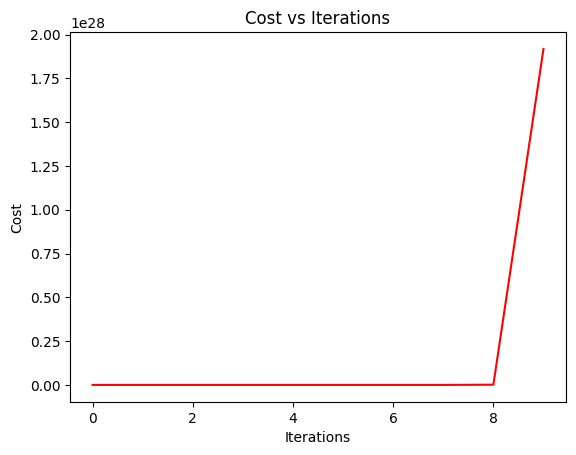

In [284]:
fig, ax = plt.subplots()
ax.plot(np.arange(iter_num), cost_history, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs Iterations')
plt.show()


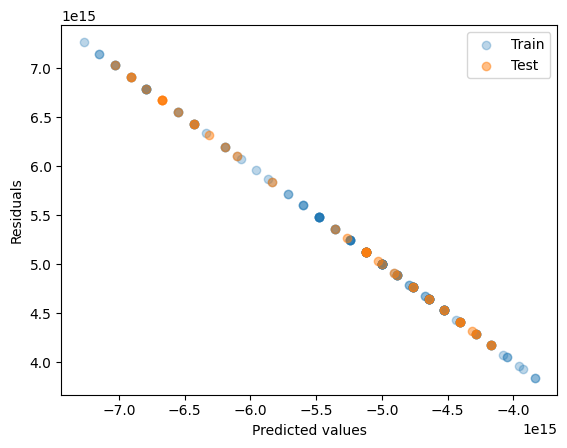

In [285]:
yhat_test = predict(theta, X_test)
yhat_train = predict(theta, X_train)
train_residuals = y_train-yhat_train
test_residuals = y_test-yhat_test
plt.scatter(yhat_train, train_residuals, label='Train', alpha=0.3)
plt.scatter(yhat_test, test_residuals, label='Test', alpha=0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [286]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(yhat_test, y_test)
mse_train = mean_squared_error(yhat_train, y_train)
print("mse test: ", mse_test)
print("mse_train: ", mse_train)
print("rmse test: ", np.sqrt(mse_test))
print("rmse train: ", np.sqrt(mse_train))

mse test:  3.0200533813769983e+31
mse_train:  2.763826712827586e+31
rmse test:  5495501234079561.0
rmse train:  5257210964786924.0


In [287]:
def r2(yhat, y):
    sum_of_squared = ((y-yhat)**2).sum()
    total_sum_of_squares = ((y-y.mean())**2).sum()
    return 1-(sum_of_squared/total_sum_of_squares)
    
r2_val = r2(yhat_test, y_test)
r2_val

-2.7611916629732555e+32